In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

print('Imported')

Imported


In [2]:
df = pd.read_csv(r'C:\Users\risha\case_study\TelcoCustomerChurn.csv')

In [3]:
def df_summary(df):
    df_U=df.nunique()
    df_M=df.isnull().sum()
    df_I=df.dtypes
    df_U=df_U.to_frame().reset_index()
    df_M=df_M.to_frame().reset_index()
    df_I=df_I.to_frame().reset_index()
    df_U = df_U.rename(columns= {0: 'Unique Data'})
    df_M = df_M.rename(columns= {0: 'Missing Data'})
    df_I = df_I.rename(columns= {0: 'Data Types'})
    output = pd.merge(pd.merge(df_M,df_U,on='index'),df_I,on='index')
    return output;  

In [4]:
df_summary(df)

,index,Missing Data,Unique Data,Data Types
0,customerID,0,7043,object
1,gender,0,2,object
2,V1,0,2,int64
3,V2,0,2,object
4,V3,0,2,object
5,V4,0,73,int64
6,V5,0,2,object
7,V6,0,3,object
8,V7,0,3,object
9,V8,0,3,object


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerID  7043 non-null   object 
 1   gender      7043 non-null   object 
 2   V1          7043 non-null   int64  
 3   V2          7043 non-null   object 
 4   V3          7043 non-null   object 
 5   V4          7043 non-null   int64  
 6   V5          7043 non-null   object 
 7   V6          7043 non-null   object 
 8   V7          7043 non-null   object 
 9   V8          7043 non-null   object 
 10  V9          7043 non-null   object 
 11  V10         7043 non-null   object 
 12  V11         7043 non-null   object 
 13  V12         7043 non-null   object 
 14  V13         7043 non-null   object 
 15  V14         7043 non-null   object 
 16  V15         7043 non-null   object 
 17  V16         7043 non-null   object 
 18  V17         7043 non-null   float64
 19  V18         7043 non-null  

In [7]:
df.V18= pd.to_numeric(df.V18, errors='coerce')
df.V18.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: V18, dtype: float64

In [8]:
df.isna().sum()

customerID     0
gender         0
V1             0
V2             0
V3             0
V4             0
V5             0
V6             0
V7             0
V8             0
V9             0
V10            0
V11            0
V12            0
V13            0
V14            0
V15            0
V16            0
V17            0
V18           11
Churn          0
dtype: int64

In [9]:
df['V18']=df['V18'].fillna(df['V18'].mean())
df['V18'].isnull().sum()

0

In [10]:
df.describe()

,V1,V4,V17,V18
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
df.drop('customerID',axis=1, inplace=True)
df.columns

Index(['gender', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'Churn'],
      dtype='object')

In [12]:
Num_Cols=df.select_dtypes(include=['float64','int64']).columns.tolist()

Cat_Cols=df.select_dtypes(include=['object']).columns.tolist()

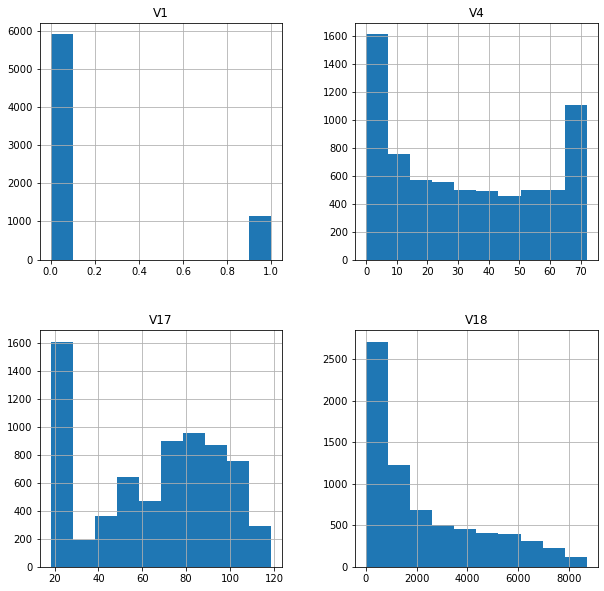

In [13]:
df[Num_Cols].hist(figsize=(10,10));

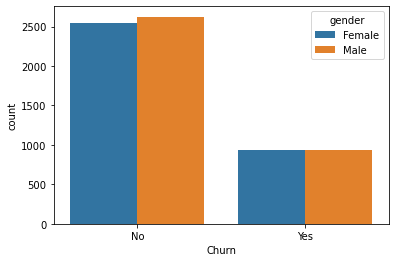

In [14]:
sns.countplot(df['Churn'],hue=df['gender']);

In [15]:
def cat_col_desc(data):
    col_list = data.select_dtypes(include=['object']).columns.tolist()
    for i in col_list:
        print('Variable : ',i)
        print ('Count of unique values :', data[i].nunique())
        print ('Unique values : ', data[i].unique())
        print('...................................')

In [16]:
cat_col_desc(df)

Variable :  gender
Count of unique values : 2
Unique values :  ['Female' 'Male']
...................................
Variable :  V2
Count of unique values : 2
Unique values :  ['Yes' 'No']
...................................
Variable :  V3
Count of unique values : 2
Unique values :  ['No' 'Yes']
...................................
Variable :  V5
Count of unique values : 2
Unique values :  ['No' 'Yes']
...................................
Variable :  V6
Count of unique values : 3
Unique values :  ['No phone service' 'No' 'Yes']
...................................
Variable :  V7
Count of unique values : 3
Unique values :  ['DSL' 'Fiber optic' 'No']
...................................
Variable :  V8
Count of unique values : 3
Unique values :  ['No' 'Yes' 'No internet service']
...................................
Variable :  V9
Count of unique values : 3
Unique values :  ['Yes' 'No' 'No internet service']
...................................
Variable :  V10
Count of unique values : 3
Unique 

(array([2365.,    0.,    0., 1612.,    0.,    0., 1544.,    0.,    0.,
        1522.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

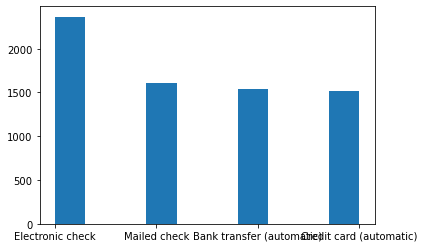

In [17]:
plt.hist(df['V16'])

<AxesSubplot:xlabel='V17'>

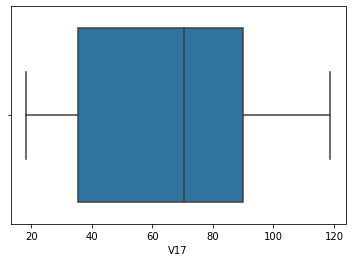

In [18]:
sns.boxplot(df['V17'])

In [19]:
Binary_class = df[Cat_Cols].nunique()[df[Cat_Cols].nunique() == 2].keys().tolist()
Multi_class =  df[Cat_Cols].nunique()[df[Cat_Cols].nunique() > 2].keys().tolist()
print(Binary_class)
print(Multi_class)

['gender', 'V2', 'V3', 'V5', 'V15', 'Churn']
['V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V16']


In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in Binary_class:
    df[i]=le.fit_transform(df[i])

In [21]:
df[Binary_class].shape

(7043, 6)

In [22]:
df_dummy = pd.get_dummies(df[Multi_class]);
df_dummy.head()

,V6_No,V6_No phone service,V6_Yes,V7_DSL,V7_Fiber optic,V7_No,V8_No,V8_No internet service,V8_Yes,V9_No,...,V13_No,V13_No internet service,V13_Yes,V14_Month-to-month,V14_One year,V14_Two year,V16_Bank transfer (automatic),V16_Credit card (automatic),V16_Electronic check,V16_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,1,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0


In [23]:
final_df = pd.concat([df[Num_Cols],df[Binary_class],df_dummy],axis=1)
final_df.shape

(7043, 41)

In [24]:
final_df

,V1,V4,V17,V18,gender,V2,V3,V5,V15,Churn,...,V13_No,V13_No internet service,V13_Yes,V14_Month-to-month,V14_One year,V14_Two year,V16_Bank transfer (automatic),V16_Credit card (automatic),V16_Electronic check,V16_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,1,1,...,1,0,0,1,0,0,0,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,1,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,1,0,...,0,0,1,0,1,0,0,0,0,1
7039,0,72,103.20,7362.90,0,1,1,1,1,0,...,0,0,1,0,1,0,0,1,0,0
7040,0,11,29.60,346.45,0,1,1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,4,74.40,306.60,1,1,0,1,1,1,...,1,0,0,1,0,0,0,0,0,1


In [25]:
X = final_df.drop(['Churn'],axis=1)
y = final_df['Churn']

In [196]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.71 , random_state = 1234)

In [197]:
y_train.shape

(2042,)

In [198]:
X_train.shape

(2042, 40)

In [199]:
y_test.shape

(5001,)

In [200]:
X_test.shape

(5001, 40)

In [201]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [202]:
from sklearn.metrics import accuracy_score
a= accuracy_score(y_test,lr.predict(X_test))
print('Accuracy score: ',a,'\nAccuracy percentage: ',a*100)

Accuracy score:  0.8066386722655469 
Accuracy percentage:  80.66386722655469


<function matplotlib.pyplot.show(close=None, block=None)>

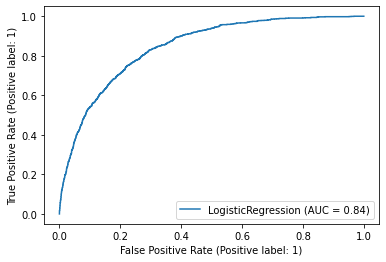

In [203]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr,X_test,y_test,)
plt.show

In [207]:
from sklearn.metrics import accuracy_score
pred_proba_df = pd.DataFrame(lr.predict_proba(X_test)[:,1])

threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8]

for i in threshold_list:
    print('For Threshold = {} '.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x : 1 if x>i else 0)
    test_accuracy = accuracy_score(y_test,Y_test_pred)
    print('Accuracy {} '.format(test_accuracy))
    print()

For Threshold = 0.05 
Accuracy 0.5056988602279544 

For Threshold = 0.1 
Accuracy 0.6032793441311738 

For Threshold = 0.15 
Accuracy 0.6608678264347131 

For Threshold = 0.2 
Accuracy 0.7090581883623275 

For Threshold = 0.25 
Accuracy 0.7426514697060588 

For Threshold = 0.3 
Accuracy 0.765246950609878 

For Threshold = 0.35 
Accuracy 0.7796440711857628 

For Threshold = 0.4 
Accuracy 0.7908418316336733 

For Threshold = 0.45 
Accuracy 0.7984403119376124 

For Threshold = 0.5 
Accuracy 0.8066386722655469 

For Threshold = 0.55 
Accuracy 0.8038392321535693 

For Threshold = 0.6 
Accuracy 0.7996400719856028 

For Threshold = 0.65 
Accuracy 0.7878424315136973 

For Threshold = 0.7 
Accuracy 0.7776444711057788 

For Threshold = 0.75 
Accuracy 0.7620475904819036 

For Threshold = 0.8 
Accuracy 0.7458508298340332 

